In [1]:
## Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read and preview dataset
fish = pd.read_csv(r'C:\Users\benja\OneDrive\Desktop\Datasets\Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
## Convert Species (Categorical to Number Target - There are 7 classes)
le = LabelEncoder()
y = le.fit_transform(fish.Species)
fish['Target'] = pd.Series(y)
fish.drop(columns='Species', inplace=True)
fish.sample(3)

,Weight,Length1,Length2,Length3,Height,Width,Target
12,500.0,29.1,31.5,36.4,13.7592,4.3680,0
113,700.0,34.0,36.0,38.3,10.6091,6.7408,2
50,200.0,22.1,23.5,26.8,7.3968,4.1272,4


In [4]:
## We define our feature and target variables
X = fish.drop(columns='Target')
y = fish.Target

## We split our data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1234)

### 1) Logistic Regression

In [5]:
## We instantiate the model and fit
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print("Model Predict:" +str(y_pred))
print("\n")
print("Actual Species: " + str(np.array(y_test)))
print("\n")
print('Accuracy: ', log_reg.score(X_test,y_test))

## Alternatively, for accuracy you can obtain it this way :
print('Accuracy v2: ', accuracy_score(y_test,y_pred))


Model Predict:[2 0 2 3 4 2 4 5 4 0 0 2 4 0 2 0 2 0 4 3 0 2 2 5 4 0 6 2 5 0 3 2 0 2 5 2 5
 3 2 3]


Actual Species: [2 0 6 3 2 2 2 5 4 0 0 2 2 1 2 1 2 0 4 3 0 6 2 4 4 0 2 2 5 0 3 2 1 2 5 2 5
 3 4 3]


Accuracy:  0.725
Accuracy v2:  0.725


Precision: 0.6592307692307692
Recall: 0.725


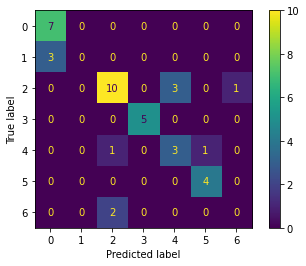

In [6]:
## Logistic Regression Confusion Matrix
plot_confusion_matrix(log_reg,X_test,y_test)
print("Precision: " + str(precision_score(y_test,y_pred,average='weighted')))
print("Recall: " + str(recall_score(y_test,y_pred,average='weighted')))
plt.show()

### 2) K-NN 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Model Predict:" +str(y_pred))
print("\n")
print("Actual Species: " + str(np.array(y_test)))
print("\n")
print('Accuracy: ', knn.score(X_test,y_test))

Model Predict:[2 0 2 0 5 2 5 5 2 0 0 2 2 2 0 2 0 0 5 0 2 0 2 5 2 0 2 2 5 2 0 2 2 2 5 2 5
 2 2 2]


Actual Species: [2 0 6 3 2 2 2 5 4 0 0 2 2 1 2 1 2 0 4 3 0 6 2 4 4 0 2 2 5 0 3 2 1 2 5 2 5
 3 4 3]


Accuracy:  0.475


Precision: 0.2962121212121212
Recall: 0.475


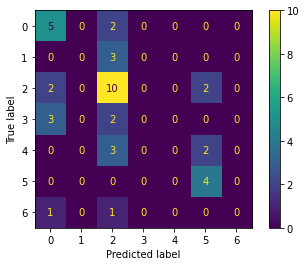

In [8]:
## K-NN Confusion Matrix
plot_confusion_matrix(knn,X_test,y_test)
print("Precision: " + str(precision_score(y_test,y_pred,average='weighted')))
print("Recall: " + str(recall_score(y_test,y_pred,average='weighted')))
plt.show()

### 3) Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Model Prediction: "+str(y_pred))
print("\n")
print("Actual Species : " + str(np.array(y_test)))
print("\n")
print("Accuracy: " +str(dt.score(X_test,y_test)))

Model Prediction: [4 0 4 3 5 2 2 5 4 0 0 2 4 1 2 1 2 0 2 3 0 6 2 4 2 0 0 2 5 0 3 4 1 2 5 2 5
 3 2 3]


Actual Species : [2 0 6 3 2 2 2 5 4 0 0 2 2 1 2 1 2 0 4 3 0 6 2 4 4 0 2 2 5 0 3 2 1 2 5 2 5
 3 4 3]


Accuracy: 0.775




Precision: 0.6639204545454545
Recall: 0.675


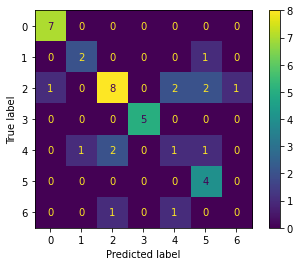

In [39]:
## DT Confusion Matrix
plot_confusion_matrix(dt,X_test,y_test)
print("\n")
print("Precision: " + str(precision_score(y_test,y_pred,average='weighted')))
print("Recall: " + str(recall_score(y_test,y_pred,average='weighted')))
plt.show()

## Hyperparameter tuning: Improving our Decision Tree with GridSearchCV

In [11]:
## We get the decision tree's params.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [12]:
param_grid  = {
    'max_depth': [0,5,10,12],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[0,2,4,6]
}
grid = GridSearchCV(dt,param_grid = param_grid, cv =5, verbose =5, n_jobs = -1)
grid.fit(X_train,y_train)
best_estimator = grid.best_estimator_

print(best_estimator)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)


In [38]:
## We redo the tree but with the better parameters: 

dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Model Prediction: "+str(y_pred))
print("\n")
print("Actual Species : " + str(np.array(y_test)))
print("\n")
print("Accuracy: "+str(dt.score(X_test,y_test)))

Model Prediction: [2 0 4 3 5 2 5 5 4 0 0 2 4 1 6 5 2 0 5 3 0 2 2 1 2 0 0 2 5 0 3 4 1 2 5 2 5
 3 2 3]


Actual Species : [2 0 6 3 2 2 2 5 4 0 0 2 2 1 2 1 2 0 4 3 0 6 2 4 4 0 2 2 5 0 3 2 1 2 5 2 5
 3 4 3]


Accuracy: 0.675
